In [14]:
import sys
sys.path.insert(1, '../../../../utils')
import numpy as np
from numpy import log, ndarray, array, mean, sqrt, arange
from pandas import read_csv, DataFrame, Series, to_timedelta, date_range, to_datetime
from matplotlib.pyplot import figure, savefig, show, subplots, plot, legend, setp
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from matplotlib.gridspec import GridSpec
import dslabs_functions
from dslabs_functions import plot_line_chart, HEIGHT, ts_aggregation_by, set_chart_labels, plot_components, plot_multiline_chart, \
series_train_test_split, plot_forecasting_series, plot_multibar_chart, FORECAST_MEASURES, plot_forecasting_eval, plot_forecasting_series, \
PersistenceOptimistRegressor, PersistenceRealistRegressor
from scipy.stats import norm, expon, lognorm
from seaborn import heatmap
from statsmodels.tsa.stattools import adfuller
from sklearn.base import RegressorMixin
from sklearn.linear_model import LinearRegression

(Date
 2010-01-01    5.837500
 2011-01-01    2.756667
 2012-01-01    6.438000
 2013-01-01    9.630000
 2014-01-01    3.800000
 Name: Inflation Rate (%), dtype: float64,
 Date
 2020-01-01    6.350
 2021-01-01    0.530
 2022-01-01    5.480
 2023-01-01    5.145
 Name: Inflation Rate (%), dtype: float64)

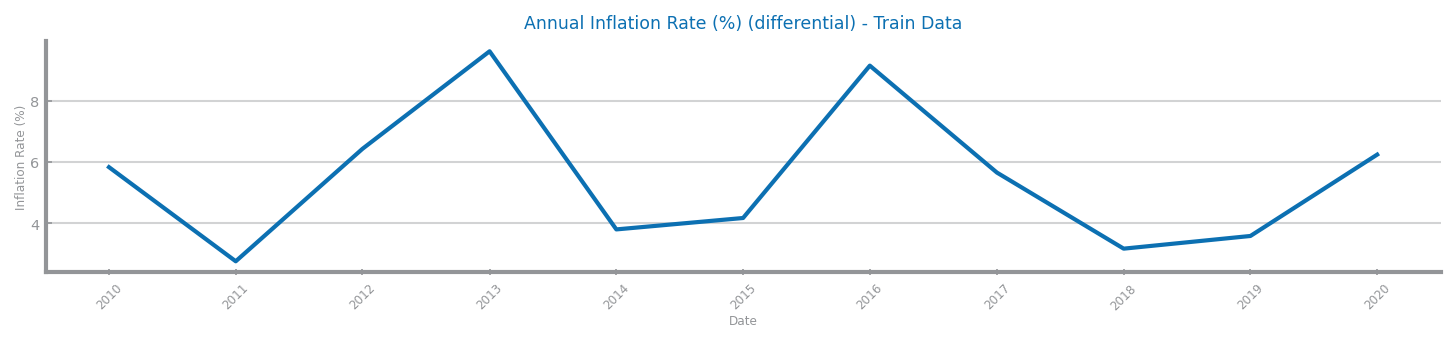

In [15]:
target = "Inflation Rate (%)"
chart_target = "inflation"
file_tag = "Smoothing"

train_path = "../../data/prepared/differential/inflation_train_differential.csv"
test_path  = "../../data/prepared/differential/inflation_test_differential.csv"

train_df = read_csv(train_path, parse_dates=["Date"], index_col="Date")
train: Series = train_df[target]
train.index = to_datetime(train.index)  # ensure proper datetime index

# Load test
test_df = read_csv(test_path, parse_dates=["Date"], index_col="Date")
test: Series = test_df[target]
test.index = to_datetime(test.index)

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    train.index.to_list(),
    train.to_list(),
    xlabel=train.index.name,
    ylabel=target,
    title=f"Annual {target} (differential) - Train Data",
)

train.head(), test.head()

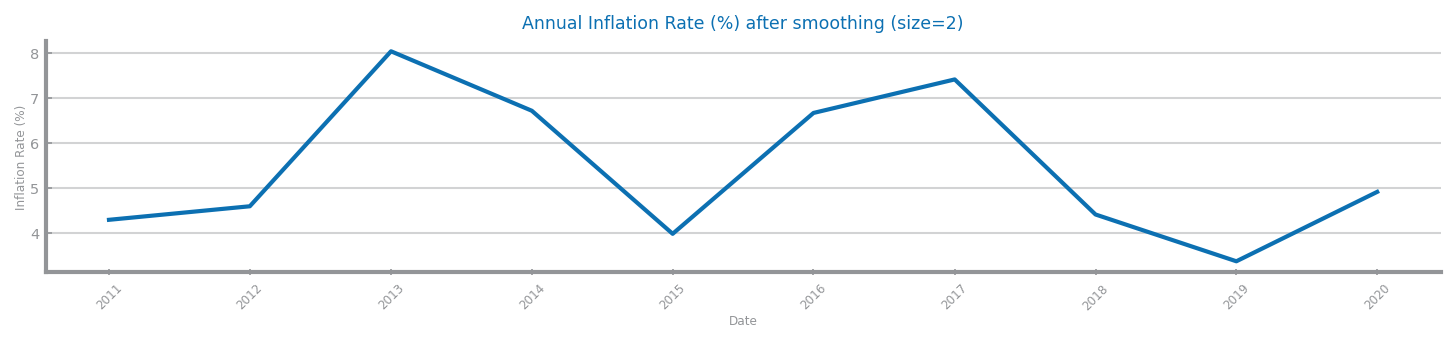

Date
2011-01-01    4.297083
2012-01-01    4.597333
2013-01-01    8.034000
2014-01-01    6.715000
2015-01-01    3.986667
Name: Inflation Rate (%), dtype: float64

In [16]:

size = 2
train_smooth_2 = train.rolling(window=size).mean().dropna()

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    train_smooth_2.index,
    train_smooth_2,
    xlabel=train_smooth_2.index.name,
    ylabel=target,
    title=f"Annual {target} after smoothing (size={size})"
)
show()
train_smooth_2.head()


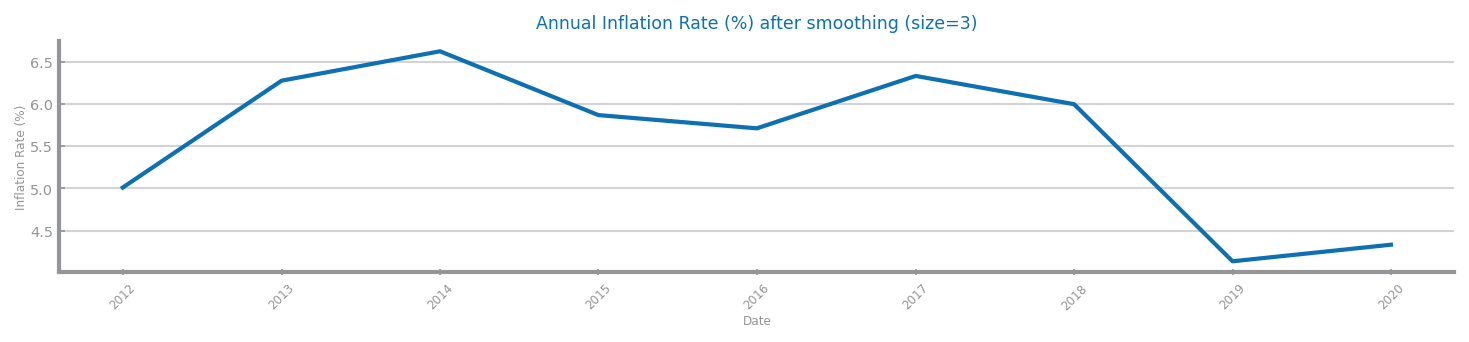

Date
2012-01-01    5.010722
2013-01-01    6.274889
2014-01-01    6.622667
2015-01-01    5.867778
2016-01-01    5.711111
Name: Inflation Rate (%), dtype: float64

In [17]:

size = 3
train_smooth_3 = train.rolling(window=size).mean().dropna()

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    train_smooth_3.index,
    train_smooth_3,
    xlabel=train_smooth_3.index.name,
    ylabel=target,
    title=f"Annual {target} after smoothing (size={size})"
)
show()
train_smooth_3.head()


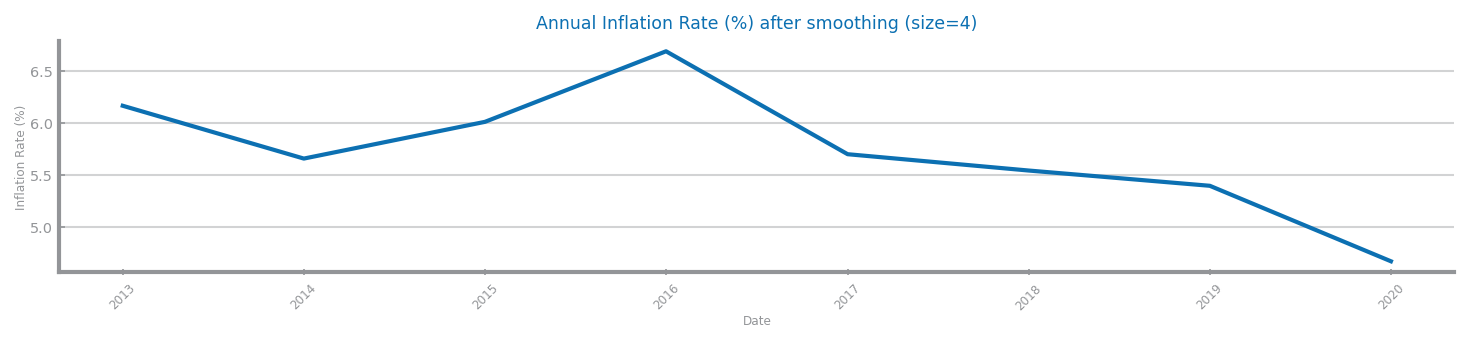

Date
2013-01-01    6.165542
2014-01-01    5.656167
2015-01-01    6.010333
2016-01-01    6.690833
2017-01-01    5.698333
Name: Inflation Rate (%), dtype: float64

In [18]:

size = 4
train_smooth_4 = train.rolling(window=size).mean().dropna()

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    train_smooth_4.index,
    train_smooth_4,
    xlabel=train_smooth_4.index.name,
    ylabel=target,
    title=f"Annual {target} after smoothing (size={size})"
)
show()
train_smooth_4.head()


**Evaluation**<br>
Note: did not apply smoothing to test set as told in the project description

**Persistent Realist**

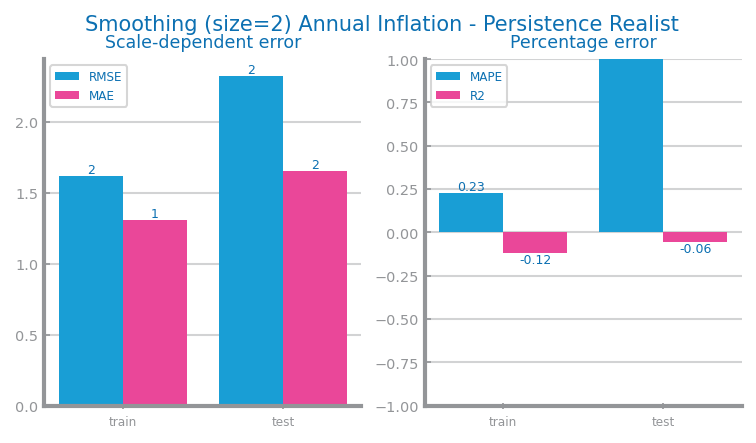

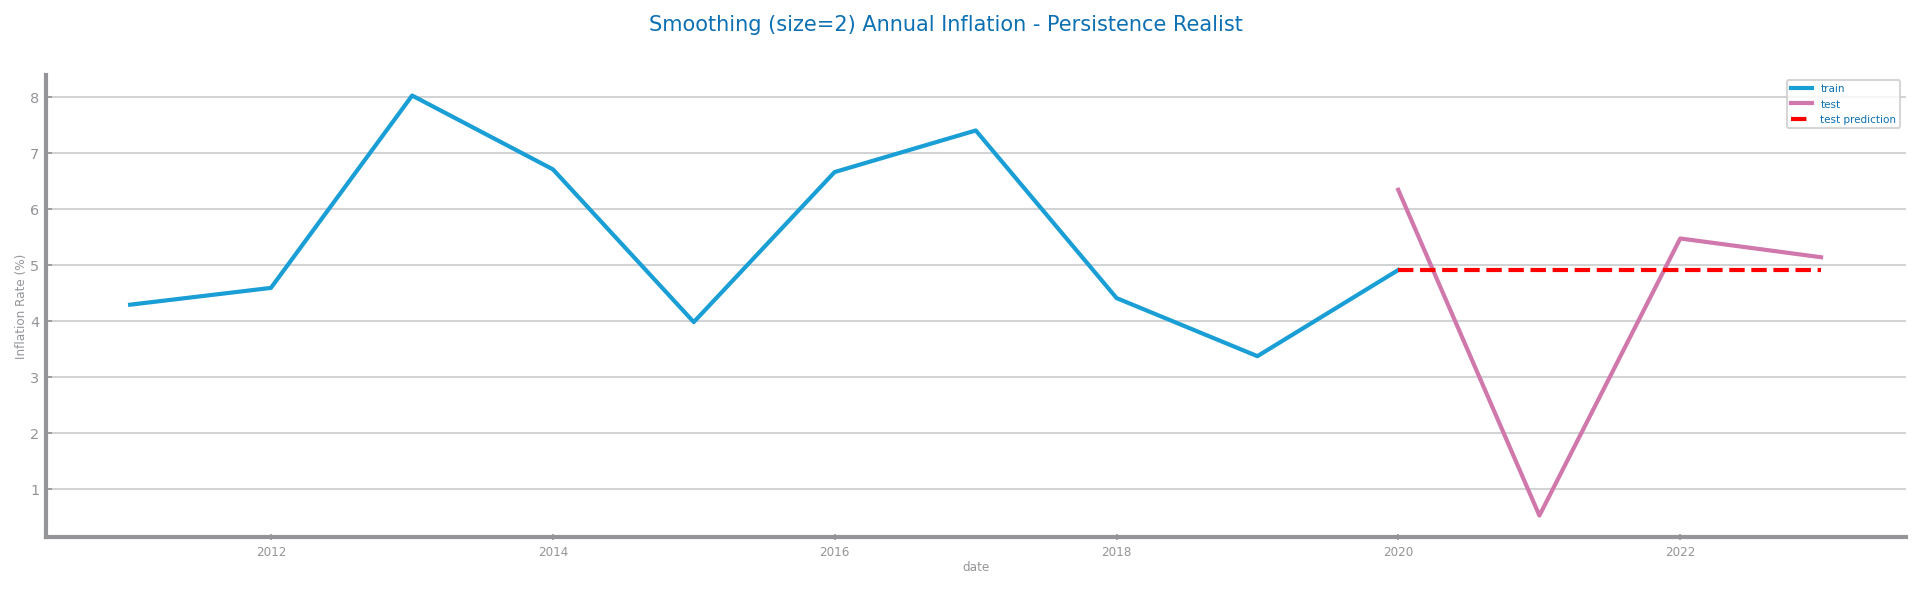

In [19]:

timecol="date"
size = 2

fr_mod = PersistenceRealistRegressor()
fr_mod.fit(train_smooth_2)
prd_trn: Series = fr_mod.predict(train_smooth_2)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train_smooth_2, test, prd_trn, prd_tst, title=f"Smoothing (size={size}) Annual Inflation - Persistence Realist")
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_persistence_real_smooth_{size}_eval.png")

plot_forecasting_series(
    train_smooth_2,
    test,
    prd_tst,
    title=f"Smoothing (size={size}) Annual Inflation - Persistence Realist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_persistence_real_smooth_{size}_forecast.png")


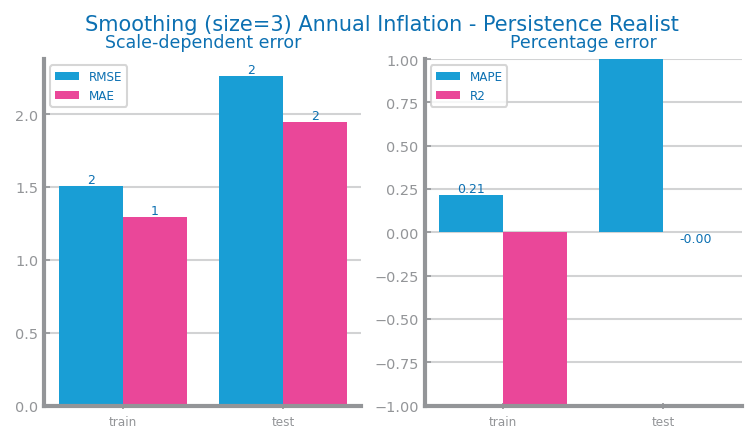

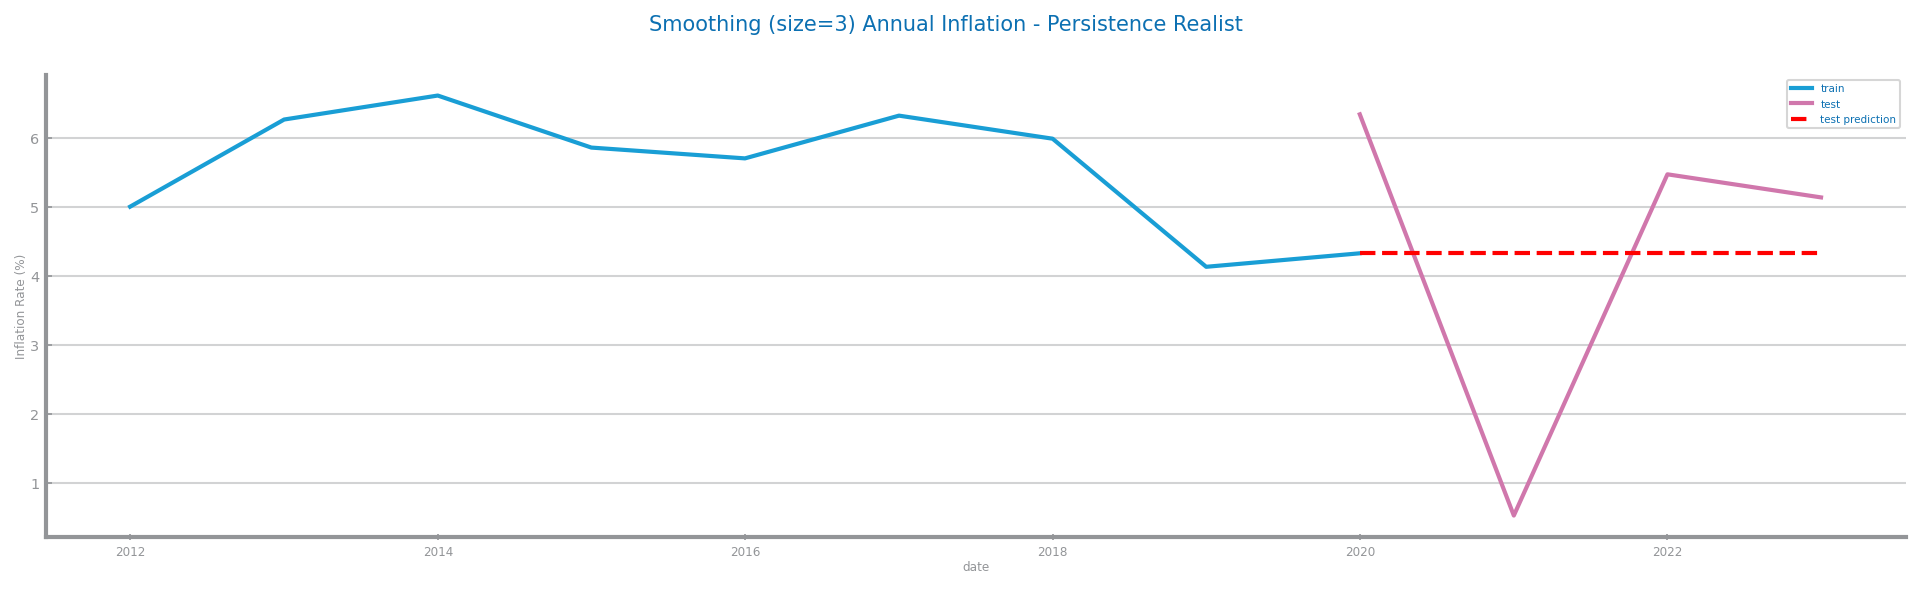

In [20]:

timecol="date"
size = 3

fr_mod = PersistenceRealistRegressor()
fr_mod.fit(train_smooth_3)
prd_trn: Series = fr_mod.predict(train_smooth_3)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train_smooth_3, test, prd_trn, prd_tst, title=f"Smoothing (size={size}) Annual Inflation - Persistence Realist")
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_persistence_real_smooth_{size}_eval.png")

plot_forecasting_series(
    train_smooth_3,
    test,
    prd_tst,
    title=f"Smoothing (size={size}) Annual Inflation - Persistence Realist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_persistence_real_smooth_{size}_forecast.png")


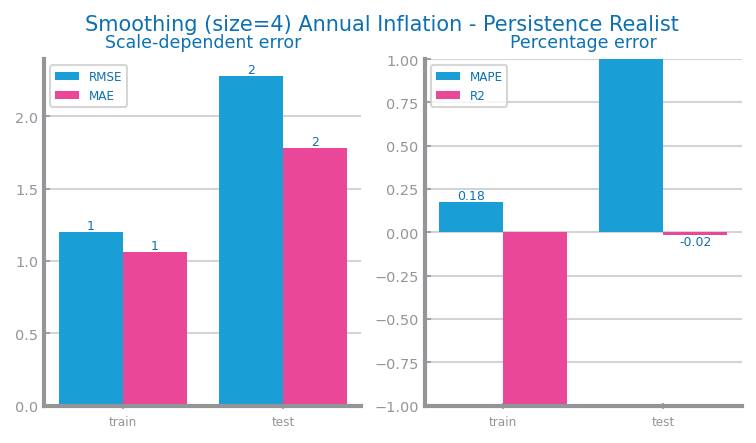

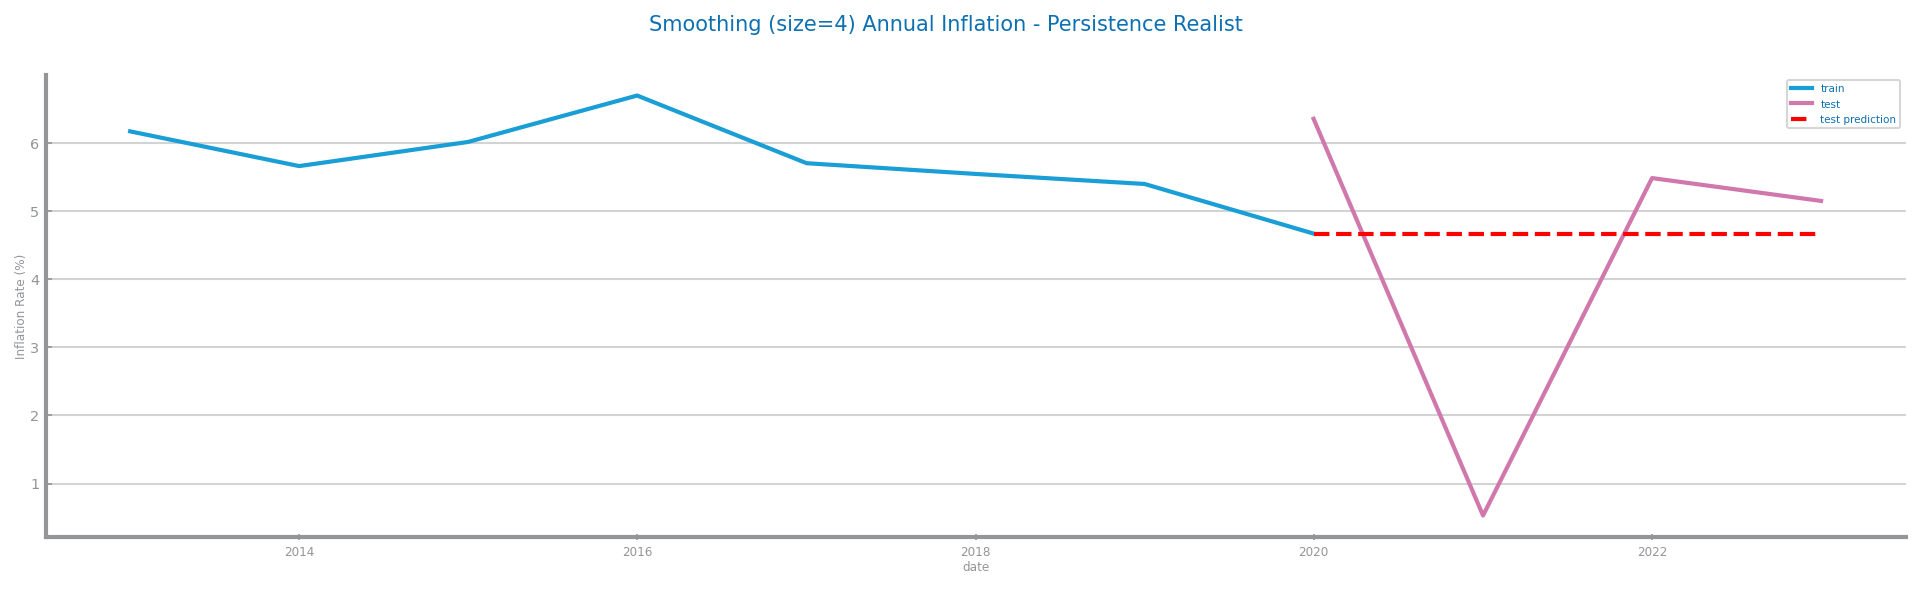

In [21]:

timecol="date"
size = 4

fr_mod = PersistenceRealistRegressor()
fr_mod.fit(train_smooth_4)
prd_trn: Series = fr_mod.predict(train_smooth_4)
prd_tst: Series = fr_mod.predict(test)

plot_forecasting_eval(train_smooth_4, test, prd_trn, prd_tst, title=f"Smoothing (size={size}) Annual Inflation - Persistence Realist")
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_persistence_real_smooth_{size}_eval.png")

plot_forecasting_series(
    train_smooth_4,
    test,
    prd_tst,
    title=f"Smoothing (size={size}) Annual Inflation - Persistence Realist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_persistence_real_smooth_{size}_forecast.png")


**Linear Regression**

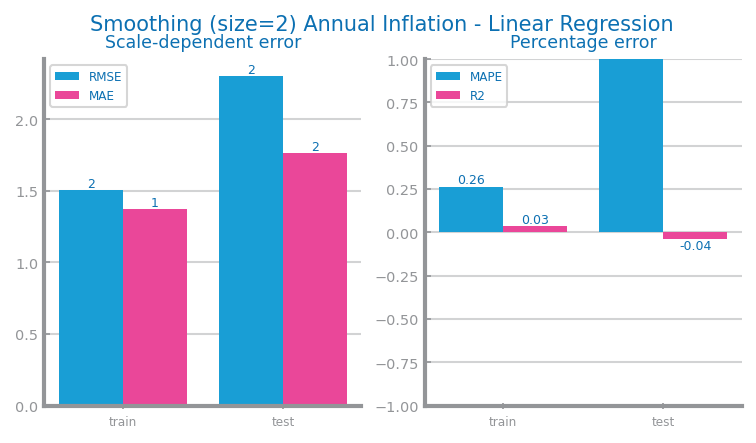

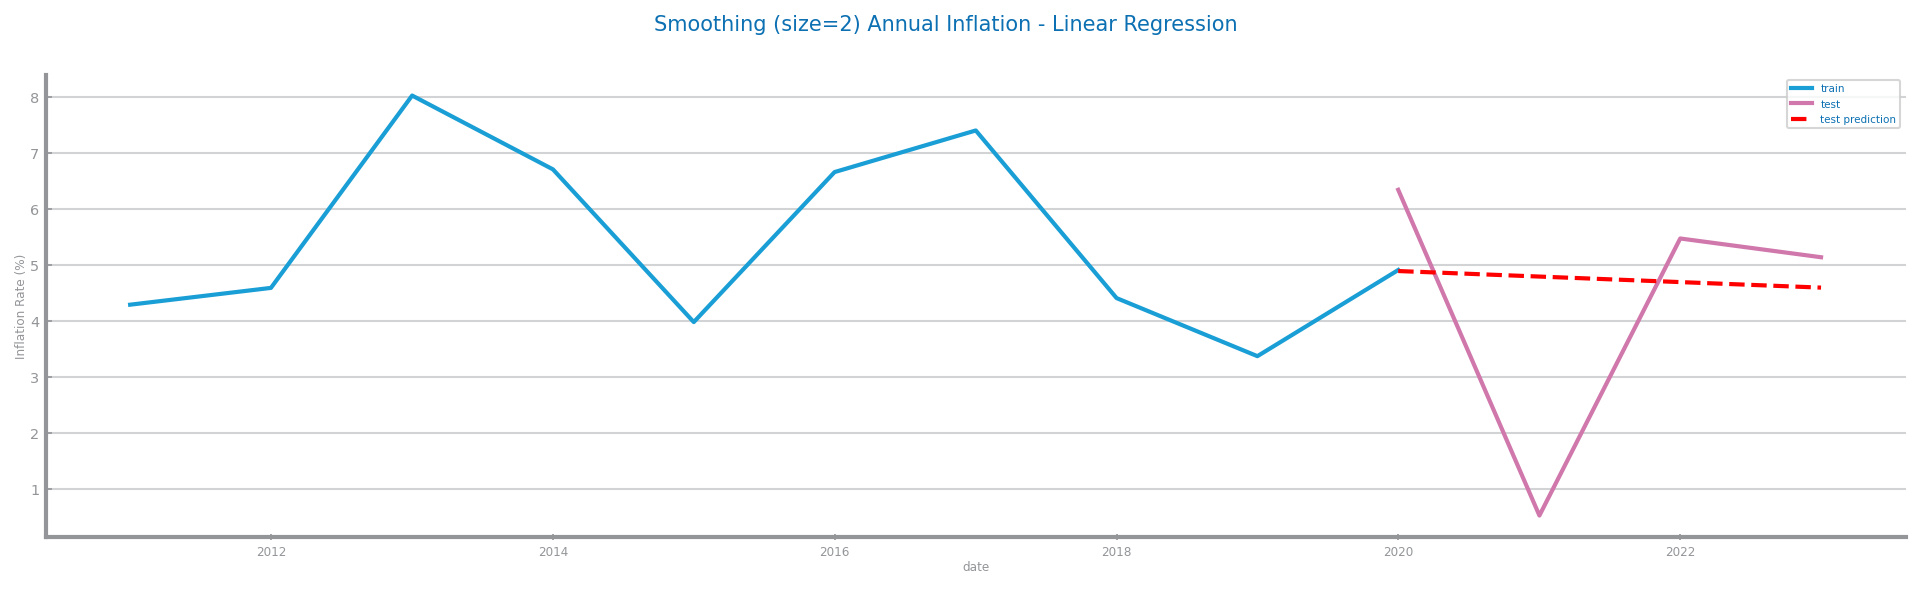

In [22]:

size = 2
n_trn = len(train_smooth_2)
n_tst = len(test)

trnX = np.arange(n_trn).reshape(-1, 1)
trnY = train_smooth_2.to_numpy()

tstX = np.arange(n_trn, n_trn + n_tst).reshape(-1, 1)
tstY = test.to_numpy()

# Train model
model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train_smooth_2.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

plot_forecasting_eval(
    train_smooth_2,
    test,
    prd_trn,
    prd_tst,
    title=f"Smoothing (size={size}) Annual Inflation - Linear Regression"
)
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_linear_regression_smooth_{size}_eval.png")

plot_forecasting_series(
    train_smooth_2,
    test,
    prd_tst,
    title=f"Smoothing (size={size}) Annual Inflation - Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_linear_regression_smooth_{size}_forecast.png")


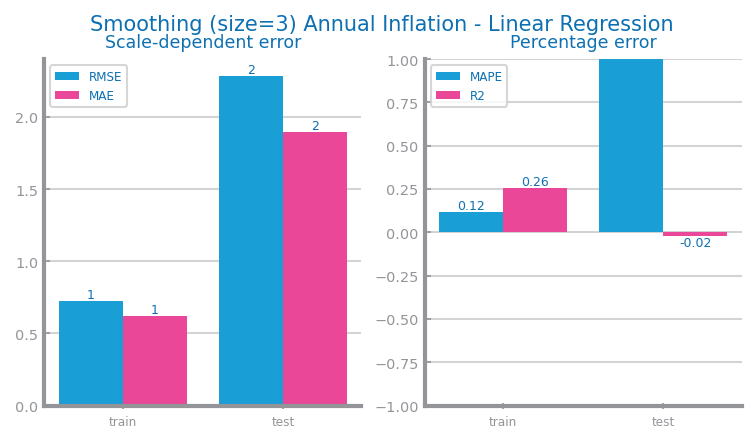

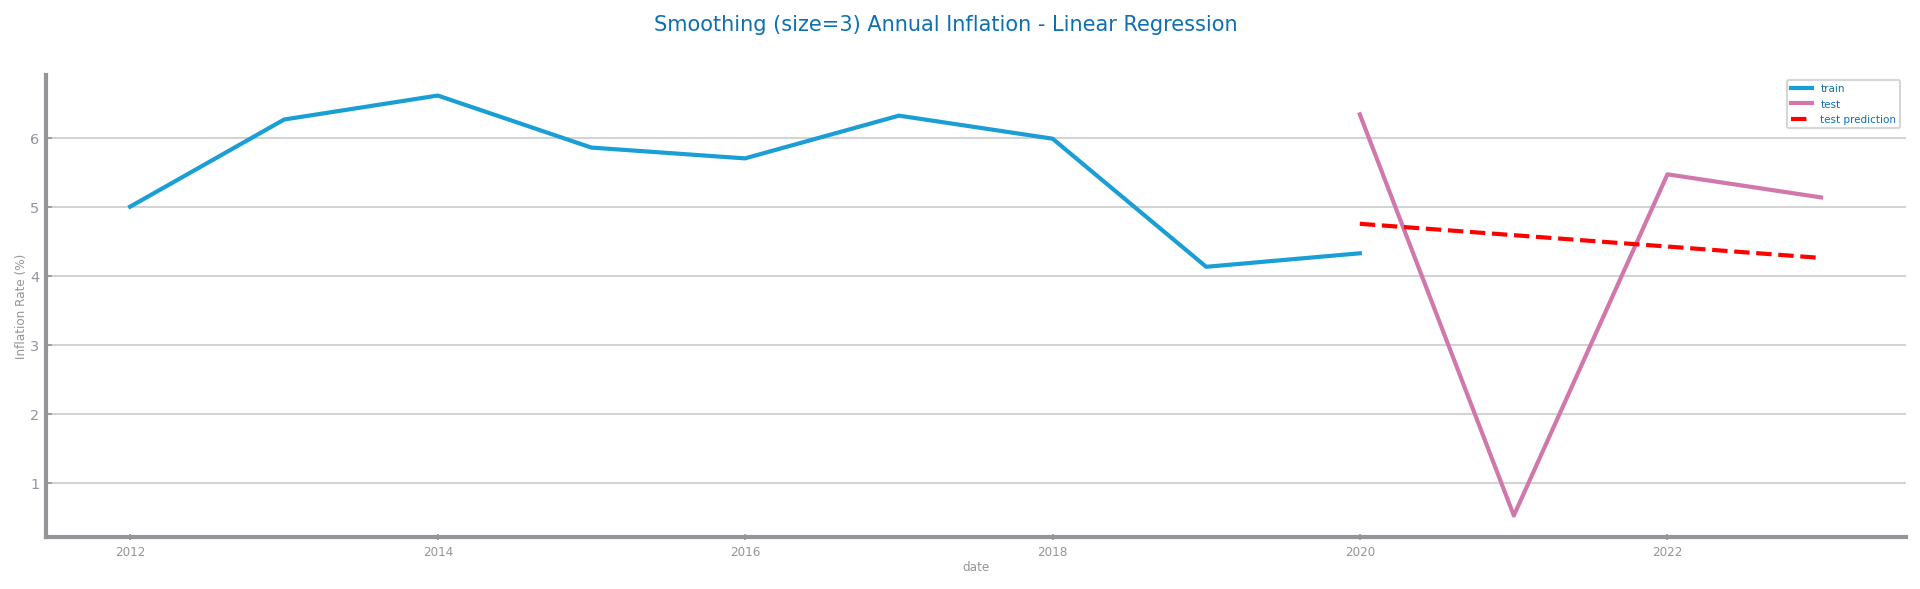

In [23]:

size = 3
n_trn = len(train_smooth_3)
n_tst = len(test)

trnX = np.arange(n_trn).reshape(-1, 1)
trnY = train_smooth_3.to_numpy()

tstX = np.arange(n_trn, n_trn + n_tst).reshape(-1, 1)
tstY = test.to_numpy()

# Train model
model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train_smooth_3.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

plot_forecasting_eval(
    train_smooth_3,
    test,
    prd_trn,
    prd_tst,
    title=f"Smoothing (size={size}) Annual Inflation - Linear Regression"
)
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_linear_regression_smooth_{size}_eval.png")

plot_forecasting_series(
    train_smooth_3,
    test,
    prd_tst,
    title=f"Smoothing (size={size}) Annual Inflation - Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_linear_regression_smooth_{size}_forecast.png")


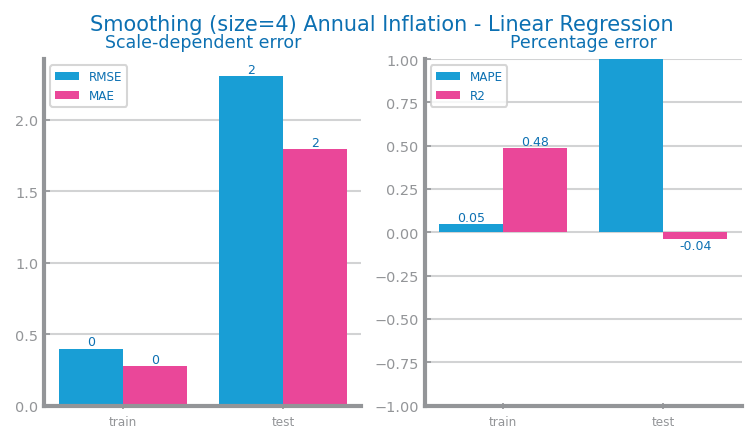

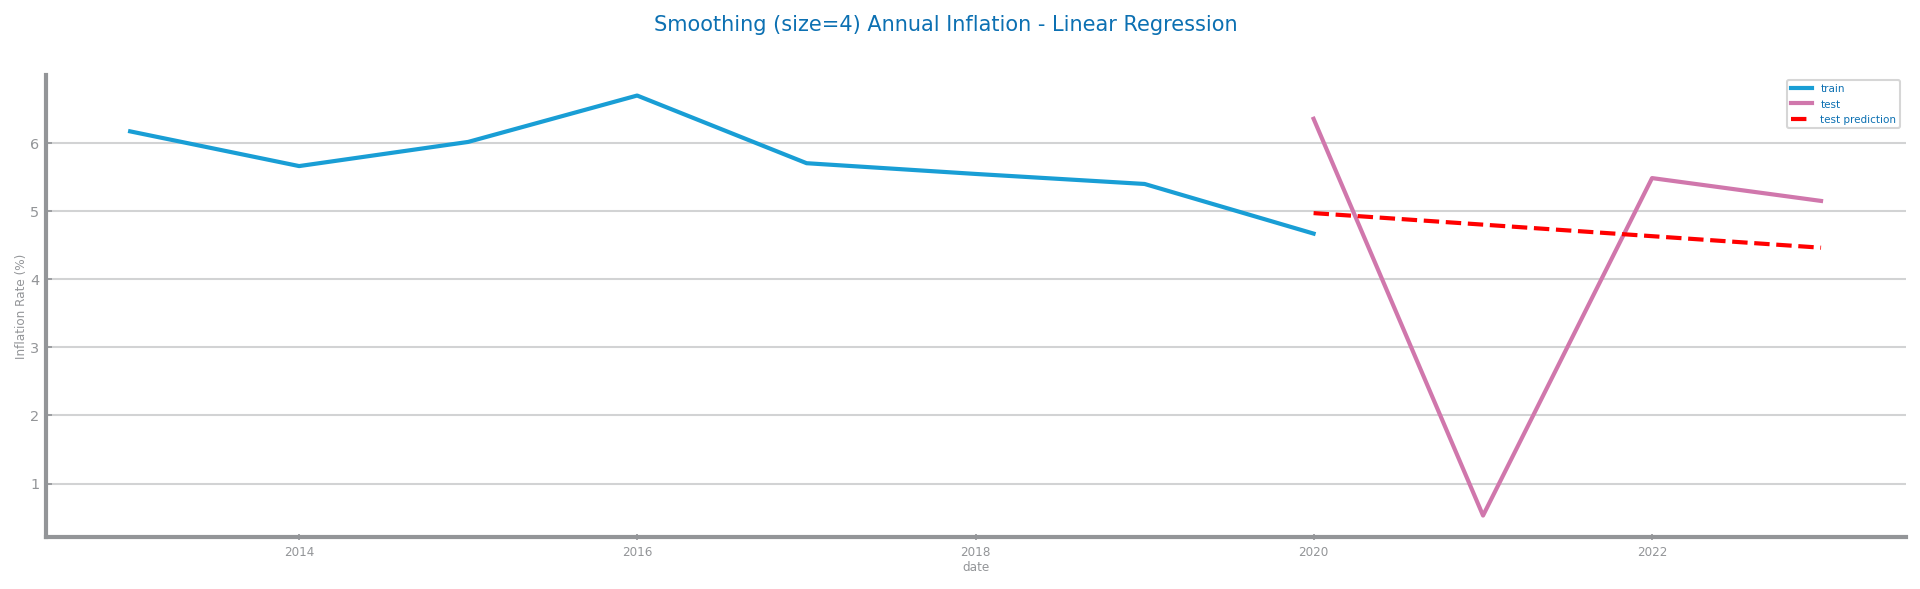

In [24]:

size = 4
n_trn = len(train_smooth_4)
n_tst = len(test)

trnX = np.arange(n_trn).reshape(-1, 1)
trnY = train_smooth_4.to_numpy()

tstX = np.arange(n_trn, n_trn + n_tst).reshape(-1, 1)
tstY = test.to_numpy()

# Train model
model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train_smooth_4.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

plot_forecasting_eval(
    train_smooth_4,
    test,
    prd_trn,
    prd_tst,
    title=f"Smoothing (size={size}) Annual Inflation - Linear Regression"
)
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_linear_regression_smooth_{size}_eval.png")

plot_forecasting_series(
    train_smooth_4,
    test,
    prd_tst,
    title=f"Smoothing (size={size}) Annual Inflation - Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/smoothing/{file_tag}_linear_regression_smooth_{size}_forecast.png")


**Evaluation Notes:**<br>
Choosing the smoothing with windowSize=2 since the Persistence Scored better than the best after aggregation and differentiation.

In [ ]:
output_train_path = "../../data/prepared/smoothing/inflation_train_smoothing.csv"
output_test_path  = "../../data/prepared/smoothing/inflation_test_smoothing.csv"

# Ensure they are DataFrames so the index is preserved cleanly
train_smooth_2.to_frame(name="Inflation Rate (%)").to_csv(output_train_path)
test.to_frame(name="Inflation Rate (%)").to_csv(output_test_path)

print("Saved train/test sets.")

Saved train/test sets - no differential treatment.
